<a href="https://colab.research.google.com/github/adityapatil4141/Deep-learning/blob/main/Functionl_API_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from keras.models import Model

In [22]:
from keras.layers import *  # '*' pronounced as "all the layers"

In [23]:
x= Input(shape=(3,))

In [24]:
hidden1 = Dense(128,activation='relu')(x) #meaning of this line = hidden1 is getting its input from (x), x = above variable
hidden2 = Dense(64,activation='relu')(hidden1)


output1 = Dense(1,activation='linear')(hidden2)
output2 = Dense(1,activation='sigmoid')(hidden2)

In [25]:
model = Model(inputs=x,outputs=[output1,output2])

In [26]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 dense_11 (Dense)            (None, 128)                  512       ['input_4[0][0]']             
                                                                                                  
 dense_12 (Dense)            (None, 64)                   8256      ['dense_11[0][0]']            
                                                                                                  
 dense_13 (Dense)            (None, 1)                    65        ['dense_12[0][0]']            
                                                                                            

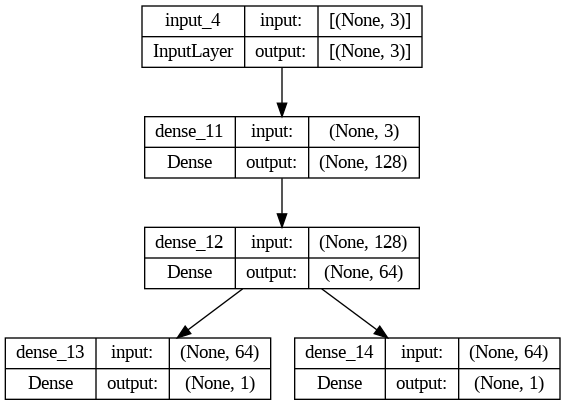

In [27]:
# To visualize what we have made uptil now:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

# Functional input multiple inputs

In [28]:
from keras.layers import *
from keras.models import Model

In [29]:
# Define 2 sets of input
input1 = Input(shape=(32, ))
input2 = Input(shape=(128, ))

In [30]:
x = Dense(8, activation='relu')(input1)
x1 = Dense(4,activation='relu')(x)

In [31]:
y = Dense(64,activation='relu')(input2)
y1 = Dense(32,activation='relu')(y)
y2 = Dense(4,activation='relu')(y1)

In [32]:
# Combine
combined = concatenate([x1,y2])

In [33]:
z = Dense(2,activation='relu')(combined)
z1 = Dense(1,activation='linear')(z)

In [34]:
model = Model(inputs=[input1,input2] , outputs=z1 )

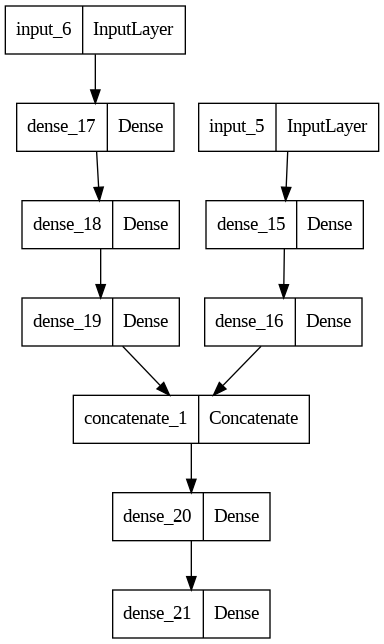

In [35]:
from keras.utils import plot_model
plot_model(model)

# Multi output model

In [36]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [37]:
!cp kaggle.json ~/.kaggle/

In [38]:
!kaggle datasets download -d jangedoo/utkface-new

 97% 321M/331M [00:04<00:00, 67.0MB/s]
100% 331M/331M [00:04<00:00, 75.7MB/s]


In [39]:
import zipfile
zip_ref = zipfile.ZipFile("/content/utkface-new.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [40]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [41]:
folder_path = "/content/utkface_aligned_cropped/UTKFace"

In [42]:
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [43]:
len(age)

23708

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame({'age':age,'gender':gender,'img_path':img_path})

In [46]:
df.head()

,age,gender,img_path
0,54,1,54_1_0_20170117171807243.jpg.chip.jpg
1,27,0,27_0_0_20170116215525646.jpg.chip.jpg
2,60,1,60_1_0_20170110143523078.jpg.chip.jpg
3,34,1,34_1_0_20170112203838660.jpg.chip.jpg
4,42,0,42_0_4_20170117142732651.jpg.chip.jpg


In [47]:
df.shape

(23708, 3)

In [48]:
train_df = df.sample(frac=1,random_state=0).iloc[:20000]
test_df = df.sample(frac=1,random_state=0).iloc[20000:]

In [49]:
train_df.shape

(20000, 3)

In [50]:
test_df.shape

(3708, 3)

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [52]:
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    directory=folder_path,
                                                    x_col='img_path',
                                                    y_col=['age','gender'],
                                                    target_size = (200,200),
                                                    class_mode = 'multi_output'
                                                    )

test_generator = test_datagen.flow_from_dataframe(test_df,
                                                  directory=folder_path,
                                                  x_col='img_path',
                                                  y_col=['age','gender'],
                                                  target_size=(200,200),
                                                  class_mode='multi_output'
                                                  )

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [53]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [55]:
vggnet = VGG16(include_top=False,input_shape=(200,200,3))

58889256/58889256 [==============================] - 0s 0us/step


In [57]:
vggnet.trainable=False

output = vggnet.layers[-1].output
flatten= Flatten()(output)


dense1 = Dense(512, activation='relu')(flatten)
dense2 = Dense(512, activation='relu')(flatten)

dense3 = Dense(512, activation='relu')(dense1)
dense4 = Dense(512, activation='relu')(dense2)

output1 = Dense(1,activation='linear',name='age')(dense3)
output2 = Dense(1,activation='sigmoid',name='gender')(dense4)



In [61]:
model = Model(inputs=vggnet.input,outputs=[output1,output2])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 200, 200, 64)         1792      ['input_7[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 200, 200, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

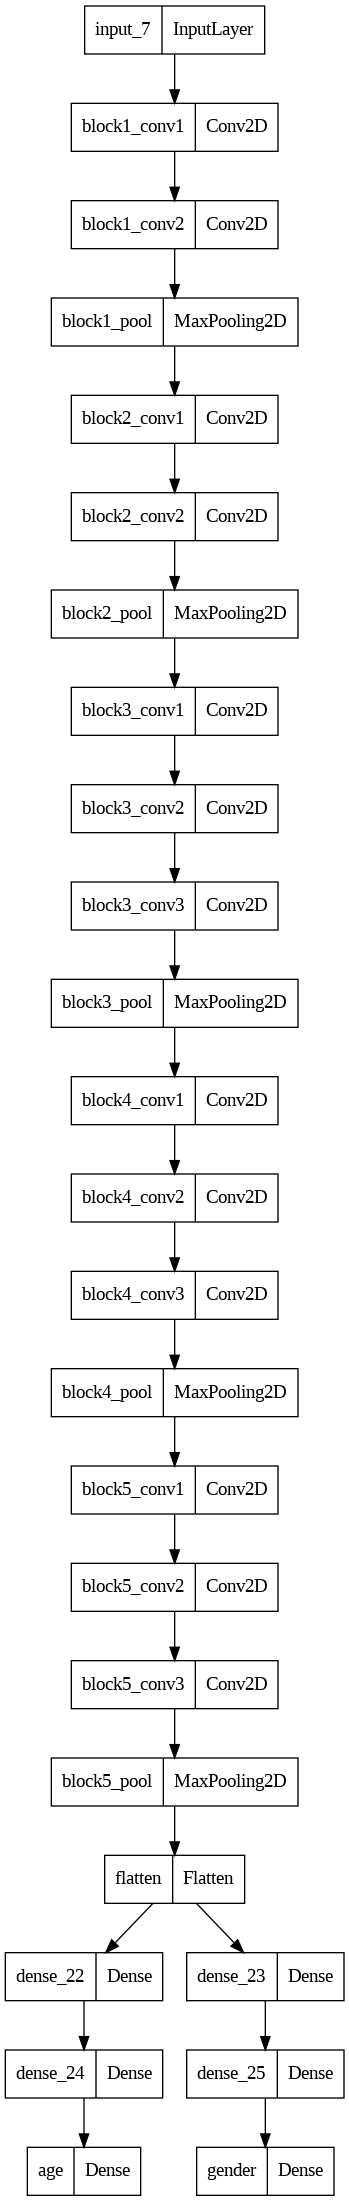

In [62]:
from keras.utils import plot_model
plot_model(model)

In [66]:
model.compile(optimizer='adam', loss={'age': 'mae', 'gender': 'binary_crossentropy'}, metrics={'age': 'mae', 'gender': 'accuracy'}, loss_weights={'age': 1, 'gender': 99})

In [ ]:
model.fit(train_generator,batch_size=32,epochs=10,validation_data=test_generator)

Epoch 1/10
  7/625 [..............................] - ETA: 2:49:09 - loss: 79.4676 - age_loss: 12.4336 - gender_loss: 0.6771 - age_mae: 12.4336 - gender_accuracy: 0.6295